###  Importation of Packages

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [129]:
# Importing Classifcation Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

### 5. Data Importation

In [130]:
# Loading dataset
heart = pd.read_csv('heart_disease.csv')

### 6. Data Cleaning and Validation

In [131]:
heart.shape

(1190, 12)

In [132]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [133]:
heart.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [134]:
heart.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [135]:
heart.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [136]:
# Renaming Columns
heart = heart.rename(columns={'chest pain type': 'chest_pain_type', 'resting bp s': 'resting_bps', 'fasting blood sugar': 'fasting_blood_sugar', 'resting ecg': 'resting_ecg', 'max heart rate': 'max_heart_rate',
                              'exercise angina': 'exercise_angina', 'ST slope': 'ST_slope'})

In [137]:
heart.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bps', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [138]:
# Creating a copy of the dataset
heart_copy = heart.copy()
heart_copy

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [139]:
heart_copy.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bps', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [140]:
# Renaming values into categorical values

sex_map = {0: 'Female', 1: 'Male'}
chest_pain_map = {1: 'Typical Angina', 2: 'Atypical Angina', 3: 'Non-Angina', 4: 'Asymptomatic Angina'}
fasting_blood_sugar_map = {0: 'False', 1: 'True'}
resting_ecg_map = {0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Left Ventricular Hypertrophy'}
exercise_angina_map = {0: 'No', 1: 'Yes'}
st_slope_map = {1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'}
target_map = {0: 'Normal', 1: 'Heart Disease'}

heart_copy['sex'] = heart_copy['sex'].map(sex_map)
heart_copy['chest_pain_type'] = heart_copy['chest_pain_type'].map(chest_pain_map)
heart_copy['fasting_blood_sugar'] = heart_copy['fasting_blood_sugar'].map(fasting_blood_sugar_map)
heart_copy['resting_ecg'] = heart_copy['resting_ecg'].map(resting_ecg_map)
heart_copy['exercise_angina'] = heart_copy['exercise_angina'].map(exercise_angina_map)
heart_copy['ST_slope'] = heart_copy['ST_slope'].map(st_slope_map)
heart_copy['target'] = heart_copy['target'].map(target_map)

In [141]:
heart_copy.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,Male,Atypical Angina,140,289,False,Normal,172,No,0.0,Upsloping,Normal
1,49,Female,Non-Angina,160,180,False,Normal,156,No,1.0,Flat,Heart Disease
2,37,Male,Atypical Angina,130,283,False,ST-T Wave Abnormality,98,No,0.0,Upsloping,Normal
3,48,Female,Asymptomatic Angina,138,214,False,Normal,108,Yes,1.5,Flat,Heart Disease
4,54,Male,Non-Angina,150,195,False,Normal,122,No,0.0,Upsloping,Normal


In [142]:
#Creating bins for some categorical variables

# Define age bins and labels
bins = [0, 18, 35, 60, 90]
labels = ['Children', 'Young Adults', 'Adults', 'Senior Citizens']

# Create age groups
heart_copy['age_group'] = pd.cut(heart_copy['age'], bins=bins, labels=labels, right=False)


# Define the bins and labels
bins = [0, 100, 130, 160, 190, float('inf')]
labels = ['Optimal', 'Near optimal', 'Borderline high', 'High', 'Very high']

# Create cholesterol groups
heart_copy['cholesterol_level'] = pd.cut(heart_copy['cholesterol'], bins=bins, labels=labels, right=False)


# Define the bins and labels
bins = [70, 90, 120, 140, 190]
labels = ['Low', 'Ideal', 'Pre-High', 'High']

# Create resting_bps groups
heart_copy['resting_bps_group'] = pd.cut(heart_copy['resting_bps'], bins=bins, labels=labels, right=False)

# Display the DataFrame
heart_copy

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target,age_group,cholesterol_level,resting_bps_group
0,40,Male,Atypical Angina,140,289,False,Normal,172,No,0.0,Upsloping,Normal,Adults,Very high,High
1,49,Female,Non-Angina,160,180,False,Normal,156,No,1.0,Flat,Heart Disease,Adults,High,High
2,37,Male,Atypical Angina,130,283,False,ST-T Wave Abnormality,98,No,0.0,Upsloping,Normal,Adults,Very high,Pre-High
3,48,Female,Asymptomatic Angina,138,214,False,Normal,108,Yes,1.5,Flat,Heart Disease,Adults,Very high,Pre-High
4,54,Male,Non-Angina,150,195,False,Normal,122,No,0.0,Upsloping,Normal,Adults,Very high,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,Male,Typical Angina,110,264,False,Normal,132,No,1.2,Flat,Heart Disease,Adults,Very high,Ideal
1186,68,Male,Asymptomatic Angina,144,193,True,Normal,141,No,3.4,Flat,Heart Disease,Senior Citizens,Very high,High
1187,57,Male,Asymptomatic Angina,130,131,False,Normal,115,Yes,1.2,Flat,Heart Disease,Adults,Borderline high,Pre-High
1188,57,Female,Atypical Angina,130,236,False,Left Ventricular Hypertrophy,174,No,0.0,Flat,Heart Disease,Adults,Very high,Pre-High


In [143]:
heart_copy.isnull().sum()

age                     0
sex                     0
chest_pain_type         0
resting_bps             0
cholesterol             0
fasting_blood_sugar     0
resting_ecg             0
max_heart_rate          0
exercise_angina         0
oldpeak                 0
ST_slope                1
target                  0
age_group               0
cholesterol_level       0
resting_bps_group      10
dtype: int64

### 7. Exploratory Data Analysis

#### 7.1 Univariate Analysis

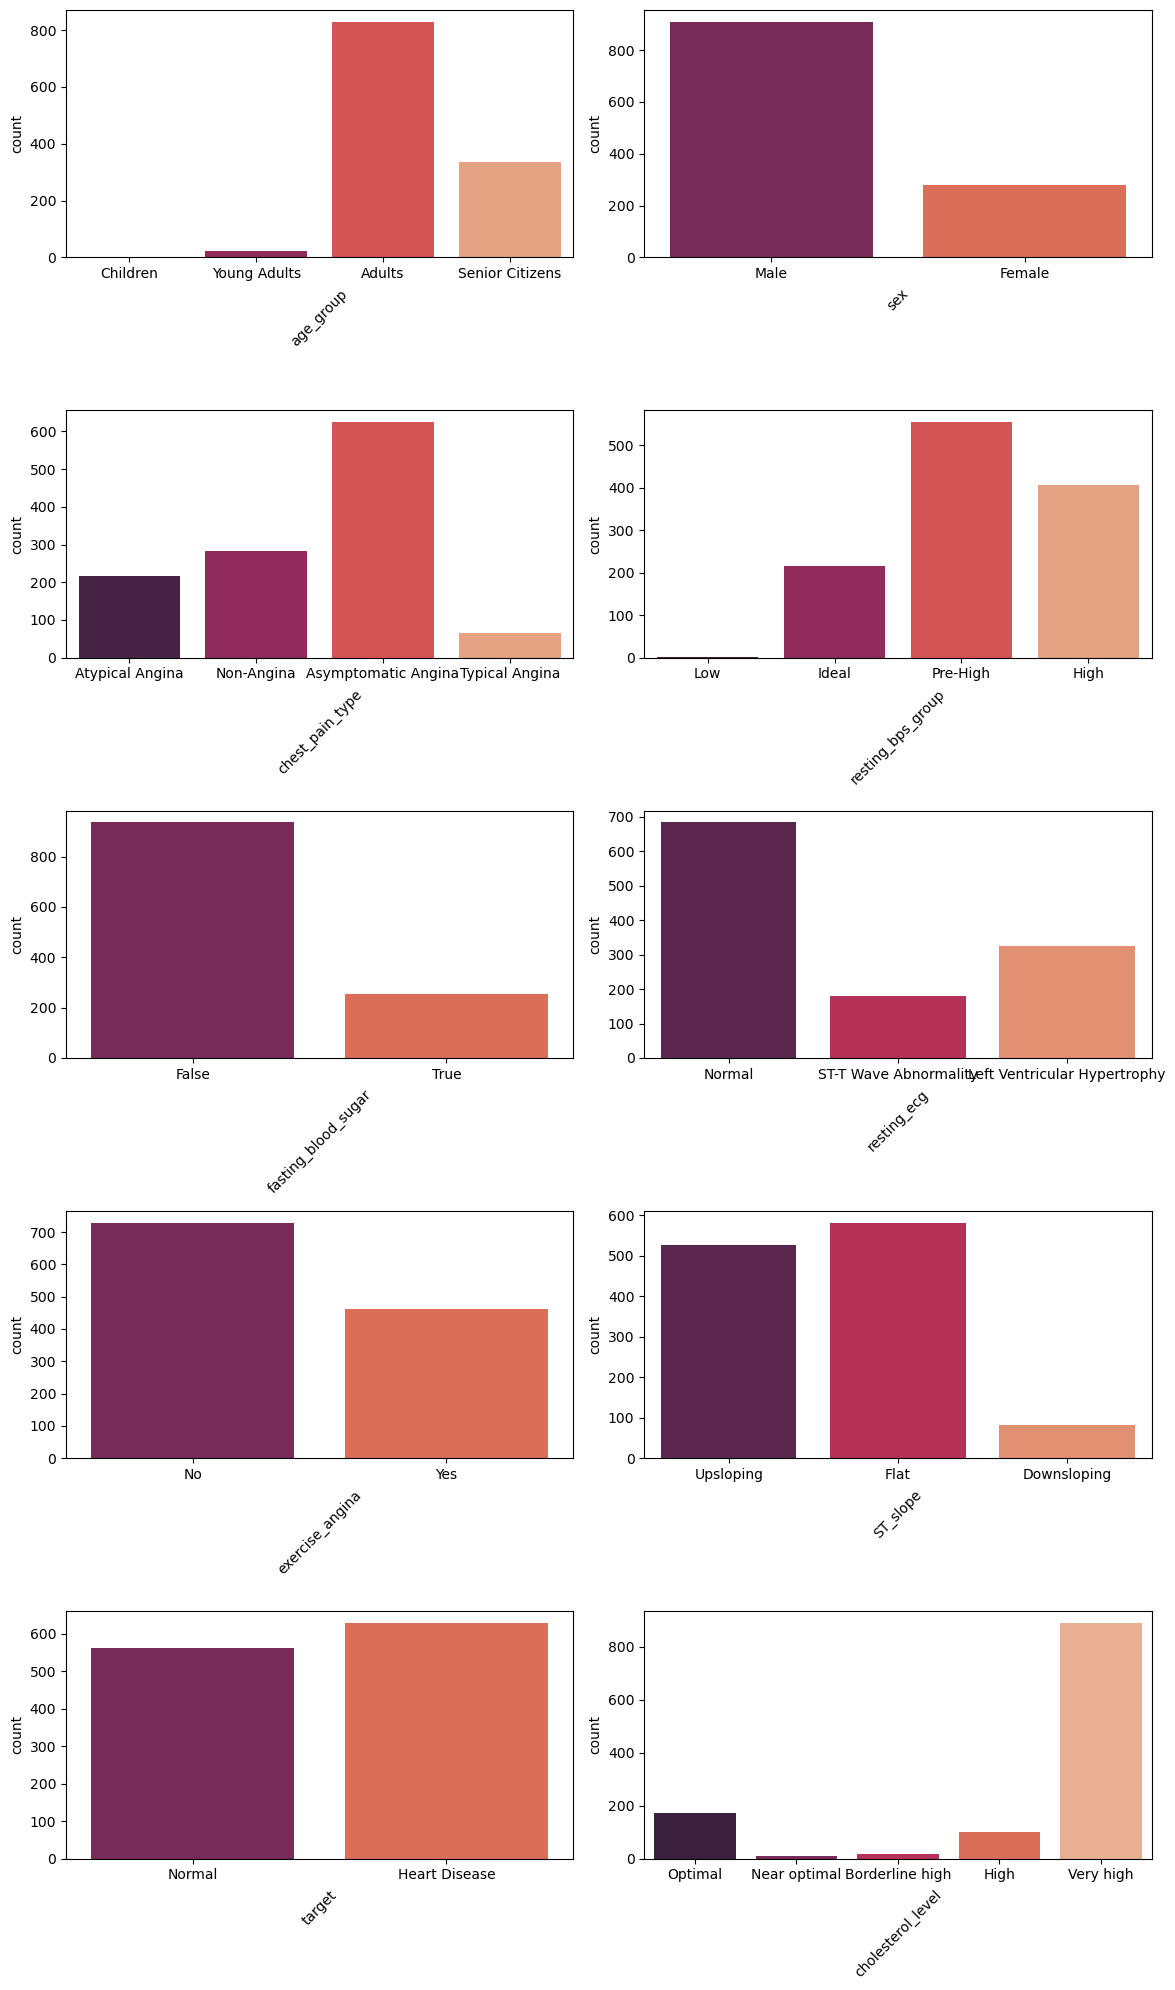

In [144]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

sns.countplot(data=heart_copy, x="age_group", ax=axes[0,0], color="plum", palette="rocket")
sns.countplot(data=heart_copy, x="sex", ax=axes[0,1], color="skyblue", palette="rocket")
sns.countplot(data=heart_copy, x="chest_pain_type", ax=axes[1,0], color="peachpuff", palette="rocket")
sns.countplot(data=heart_copy, x="resting_bps_group", ax=axes[1,1], color="salmon", palette="rocket")
sns.countplot(data=heart_copy, x="fasting_blood_sugar", ax=axes[2,0], color="lightblue", palette="rocket")
sns.countplot(data=heart_copy, x="resting_ecg", ax=axes[2,1], color="cyan", palette="rocket")
sns.countplot(data=heart_copy, x="exercise_angina", ax=axes[3,0], color="pink", palette="rocket")
sns.countplot(data=heart_copy, x="ST_slope", ax=axes[3,1], color="red", palette="rocket")
sns.countplot(data=heart_copy, x="target", ax=axes[4,0], color="green", palette="rocket")
sns.countplot(data=heart_copy, x="cholesterol_level", ax=axes[4,1], color="brown", palette="rocket")


# Add Labels and Rotate X-labels
for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


#### 7.2 Bivariate Analysis

---------- sex ----------
sex
Male      909
Female    281
Name: count, dtype: int64


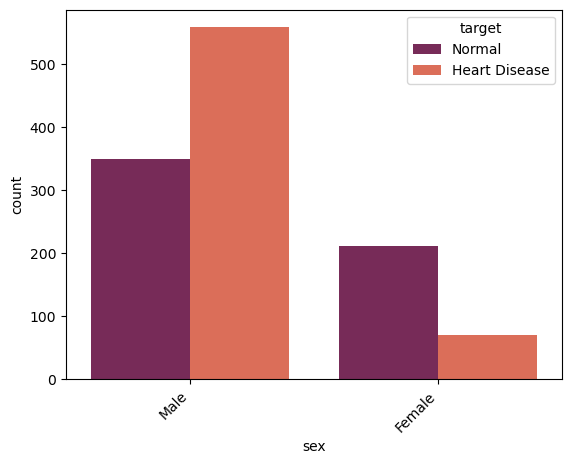

---------- chest_pain_type ----------
chest_pain_type
Asymptomatic Angina    625
Non-Angina             283
Atypical Angina        216
Typical Angina          66
Name: count, dtype: int64


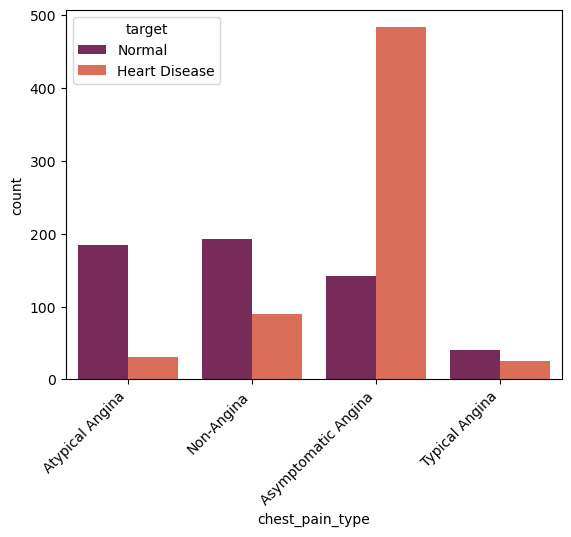

---------- fasting_blood_sugar ----------
fasting_blood_sugar
False    936
True     254
Name: count, dtype: int64


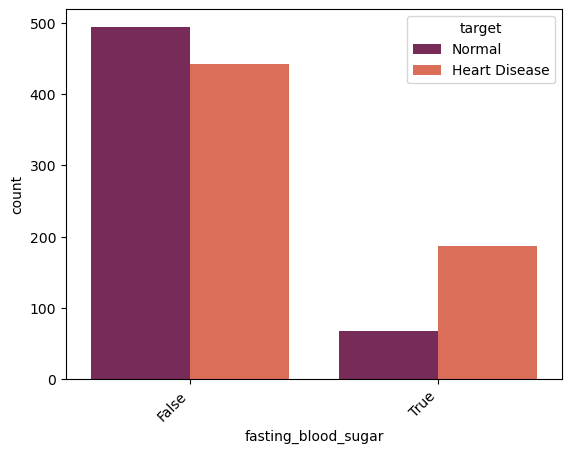

---------- resting_ecg ----------
resting_ecg
Normal                          684
Left Ventricular Hypertrophy    325
ST-T Wave Abnormality           181
Name: count, dtype: int64


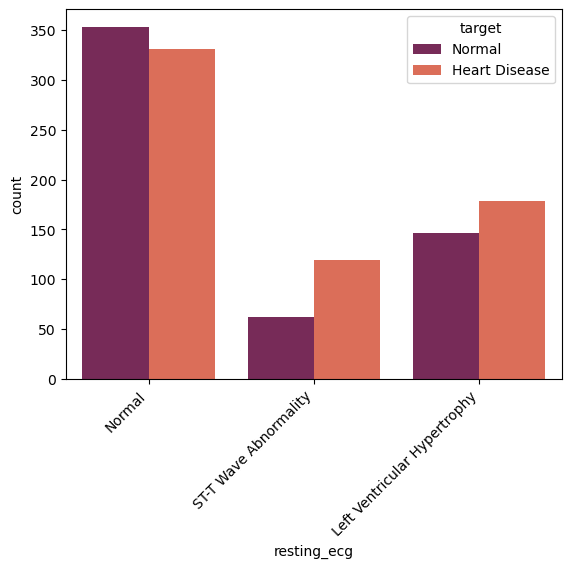

---------- exercise_angina ----------
exercise_angina
No     729
Yes    461
Name: count, dtype: int64


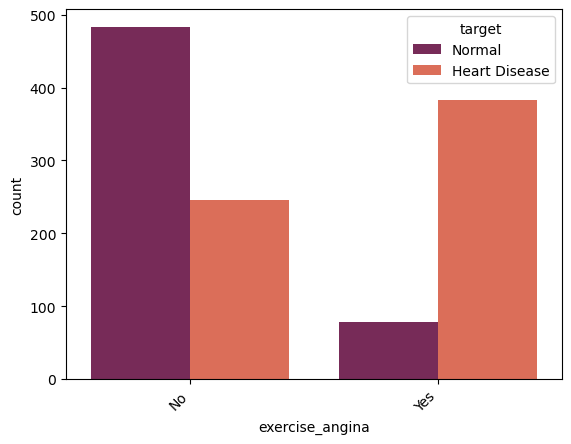

---------- ST_slope ----------
ST_slope
Flat           582
Upsloping      526
Downsloping     81
Name: count, dtype: int64


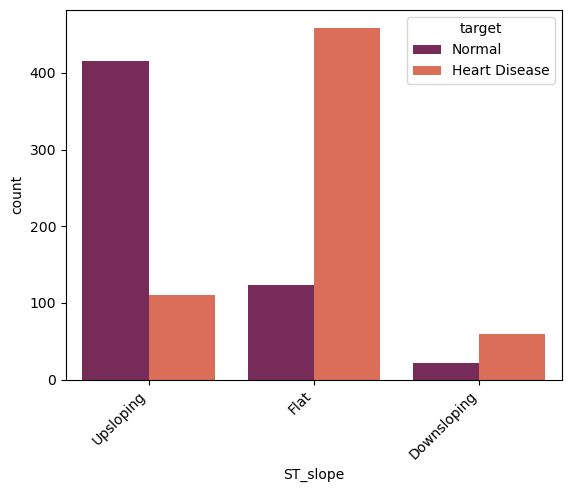

---------- age_group ----------
age_group
Adults             829
Senior Citizens    337
Young Adults        24
Children             0
Name: count, dtype: int64


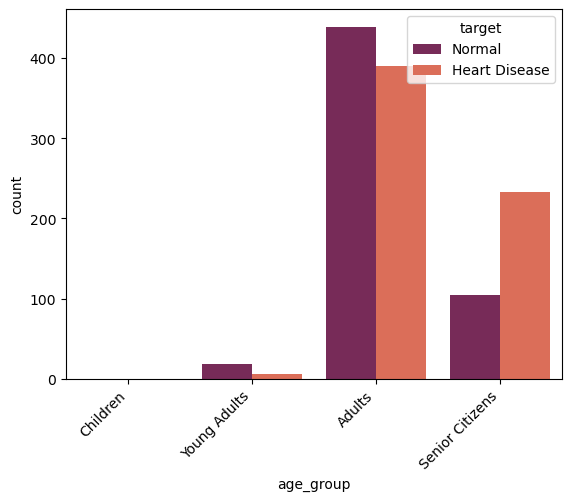

---------- cholesterol_level ----------
cholesterol_level
Very high          890
Optimal            173
High                99
Borderline high     18
Near optimal        10
Name: count, dtype: int64


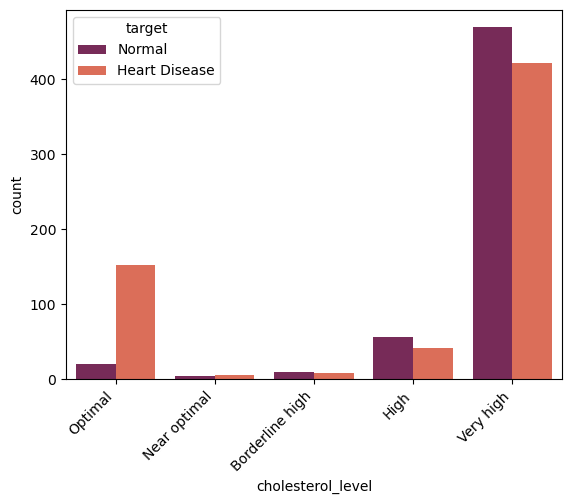

---------- resting_bps_group ----------
resting_bps_group
Pre-High    555
High        407
Ideal       217
Low           1
Name: count, dtype: int64


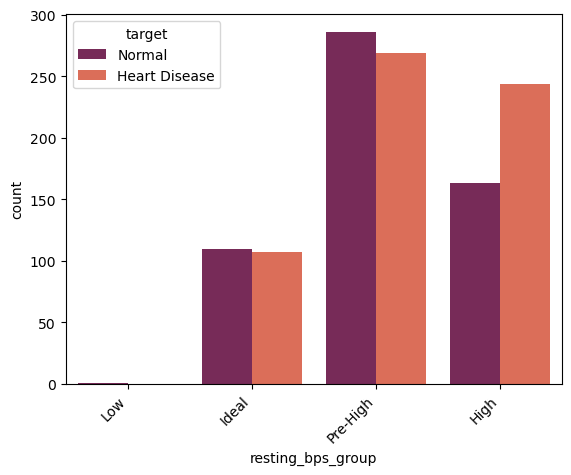

In [145]:
columns = ['sex', 'chest_pain_type',
           'fasting_blood_sugar', 'resting_ecg',
           'exercise_angina', 'ST_slope', 'age_group', 'cholesterol_level', 'resting_bps_group']

for predictor in columns:
    print('-'*10, predictor, '-'*10)
    print(heart_copy[predictor].value_counts())
    
    plt.figure()
    sns.countplot(data=heart_copy, x=predictor, hue='target', palette="rocket")
    plt.xticks(rotation=45, ha='right')
    plt.show()


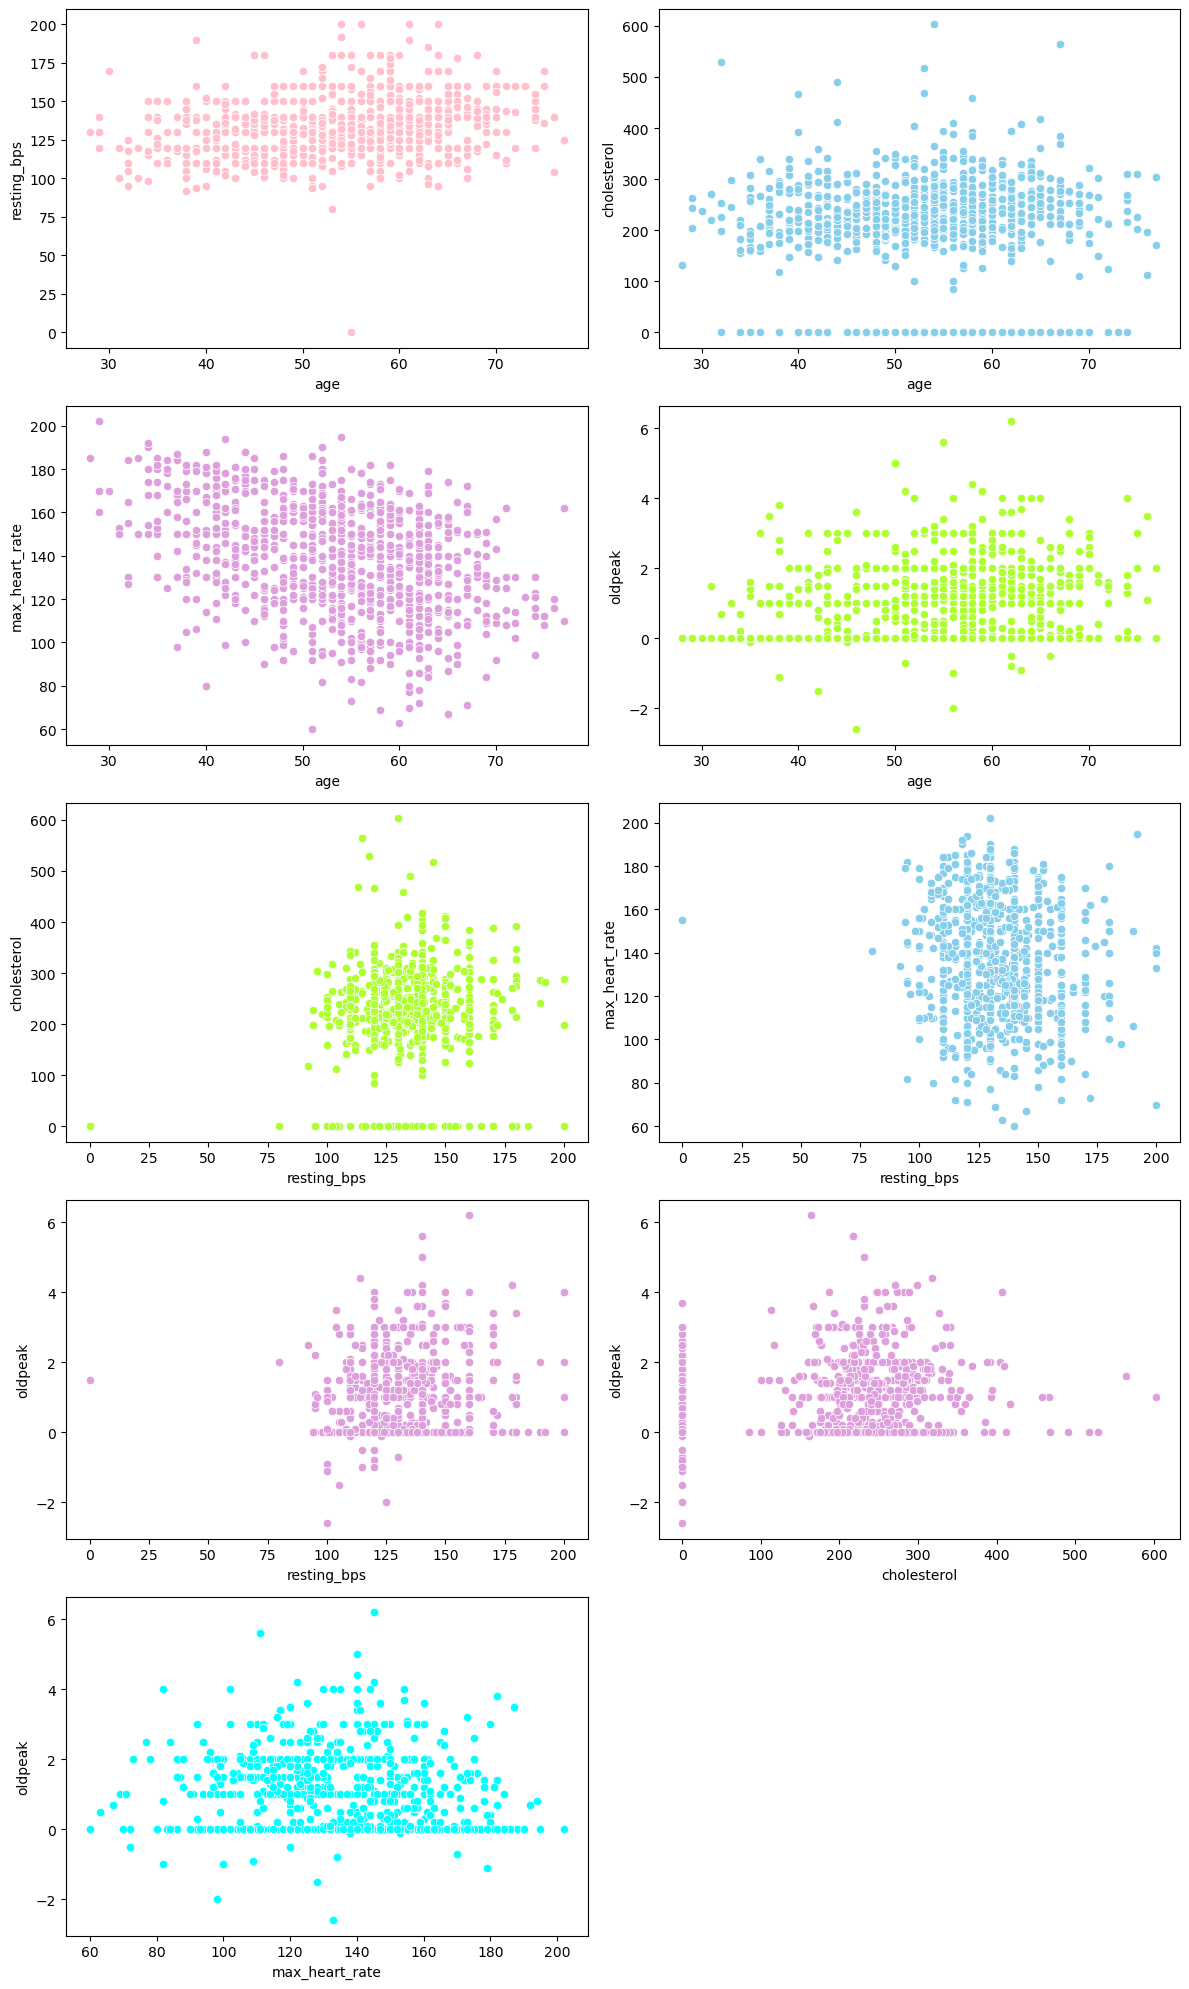

In [146]:
# Create subplots.
fig, axes=plt.subplots(nrows=5,ncols=2, figsize=(12,20))

# Plot scatterplots.
sns.scatterplot(data=heart,x='age',y='resting_bps',ax=axes[0,0],color='pink')
sns.scatterplot(data=heart,x='age',y='cholesterol',ax=axes[0,1],color='skyblue')
sns.scatterplot(data=heart,x='age',y='max_heart_rate',ax=axes[1,0],color='plum')
sns.scatterplot(data=heart,x='age',y='oldpeak',ax=axes[1,1],color='greenyellow')
sns.scatterplot(data=heart,x='resting_bps',y='cholesterol',ax=axes[2,0],color='greenyellow')
sns.scatterplot(data=heart,x='resting_bps',y='max_heart_rate',ax=axes[2,1],color='skyblue')
sns.scatterplot(data=heart,x='resting_bps',y='oldpeak',ax=axes[3,0],color='plum')
sns.scatterplot(data=heart,x='cholesterol',y='oldpeak',ax=axes[3,1],color='plum')
sns.scatterplot(data=heart,x='max_heart_rate',y='oldpeak',ax=axes[4,0],color='cyan')

fig.delaxes(axes[4,1])

plt.tight_layout()

# Show plot.
plt.show()

#### 7.3 Multivariate Analysis

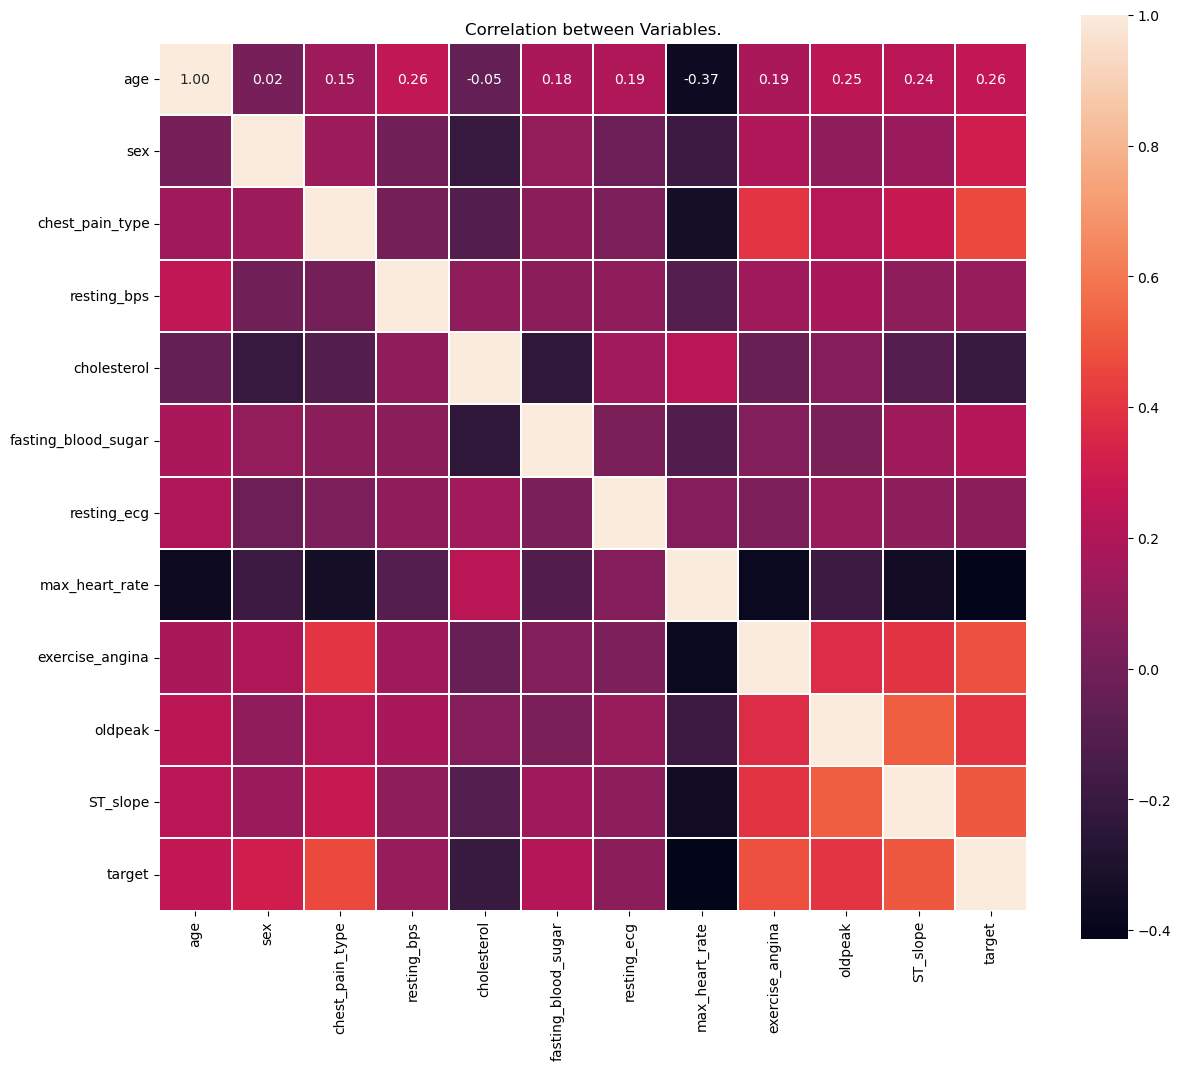

In [165]:
plt.figure(figsize=(14,12))
sns.heatmap(heart.astype(float).corr(), linewidths=0.1, fmt='.2f',annot=True, square=True, linecolor='white')
plt.title('Correlation between Variables.')
plt.show()

### 8. Data Preprocessing

In [148]:
heart.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [149]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bps          1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [150]:
# Splitting features and target
X = heart.drop('target', axis=1)
y = heart['target']

In [151]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [152]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 9. Model Building

In [153]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Train F1 Score: {train_f1:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    
    print('Classification Report (Test Data):')
    print(classification_report(y_test, y_test_pred))
    
    print('Confusion Matrix (Test Data):')
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()
    
    return train_accuracy, test_accuracy, train_f1, test_f1

In [155]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'NaiveBayes': GaussianNB(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier()
}

param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]},
    'DecisionTree': {'max_depth': [3, 5, 7, 9]},
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 9]},
    'NaiveBayes':{},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

results = []


Model: KNN
Best Parameters: {'n_neighbors': 7}
Train Accuracy: 0.8792
Test Accuracy: 0.8739
Train F1 Score: 0.8853
Test F1 Score: 0.8889
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       107
           1       0.86      0.92      0.89       131

    accuracy                           0.87       238
   macro avg       0.88      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238

Confusion Matrix (Test Data):


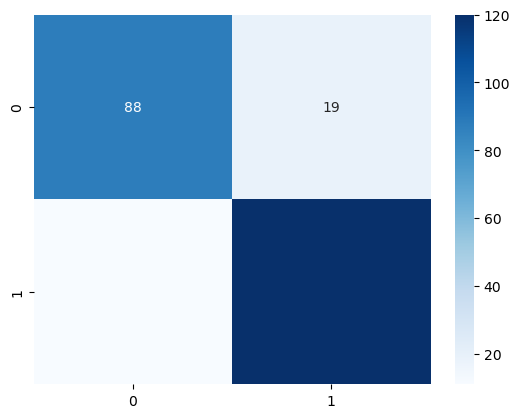


Model: SVC
Best Parameters: {'C': 10, 'gamma': 0.1}
Train Accuracy: 0.9643
Test Accuracy: 0.8992
Train F1 Score: 0.9659
Test F1 Score: 0.9070
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       107
           1       0.92      0.89      0.91       131

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238

Confusion Matrix (Test Data):


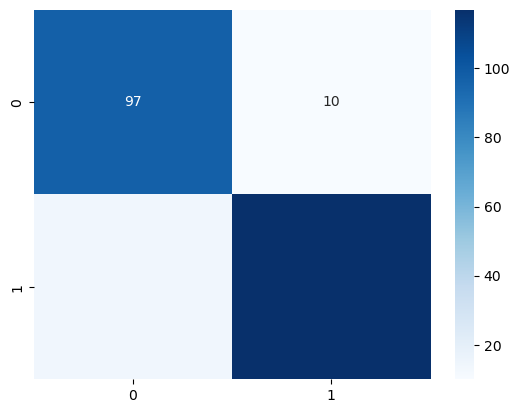


Model: DecisionTree
Best Parameters: {'max_depth': 9}
Train Accuracy: 0.9821
Test Accuracy: 0.8908
Train F1 Score: 0.9830
Test F1 Score: 0.8984
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       107
           1       0.92      0.88      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

Confusion Matrix (Test Data):


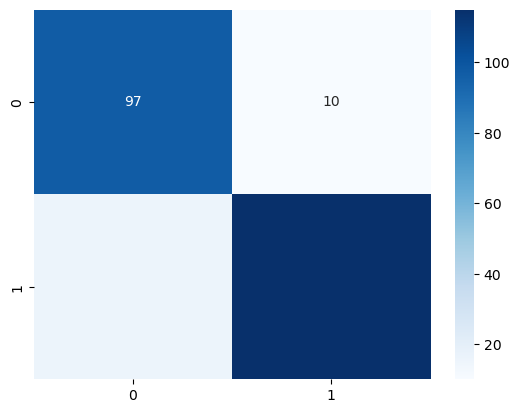


Model: LogisticRegression
Best Parameters: {'C': 0.1}
Train Accuracy: 0.8330
Test Accuracy: 0.8613
Train F1 Score: 0.8396
Test F1 Score: 0.8745
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

Confusion Matrix (Test Data):


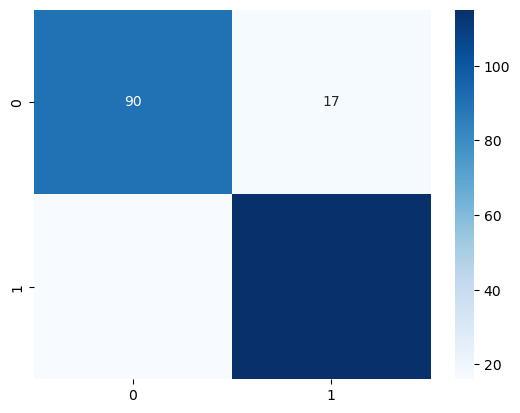


Model: RandomForest
Best Parameters: {'max_depth': 9, 'n_estimators': 50}
Train Accuracy: 0.9790
Test Accuracy: 0.9370
Train F1 Score: 0.9801
Test F1 Score: 0.9438
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       107
           1       0.93      0.96      0.94       131

    accuracy                           0.94       238
   macro avg       0.94      0.93      0.94       238
weighted avg       0.94      0.94      0.94       238

Confusion Matrix (Test Data):


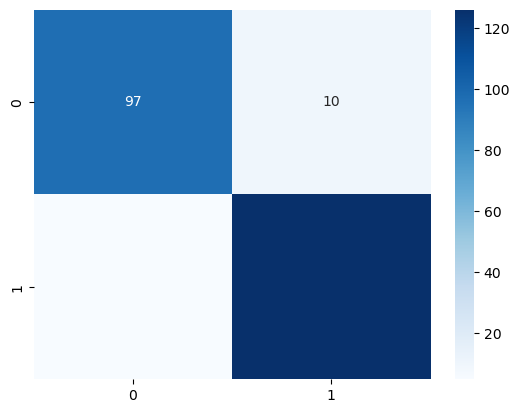


Model: NaiveBayes
Best Parameters: {}
Train Accuracy: 0.8330
Test Accuracy: 0.8571
Train F1 Score: 0.8376
Test F1 Score: 0.8712
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238

Confusion Matrix (Test Data):


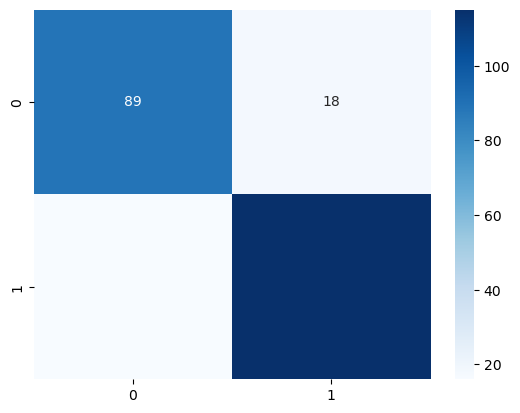


Model: XGBoost
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Train Accuracy: 1.0000
Test Accuracy: 0.9370
Train F1 Score: 1.0000
Test F1 Score: 0.9442
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       107
           1       0.92      0.97      0.94       131

    accuracy                           0.94       238
   macro avg       0.94      0.93      0.94       238
weighted avg       0.94      0.94      0.94       238

Confusion Matrix (Test Data):


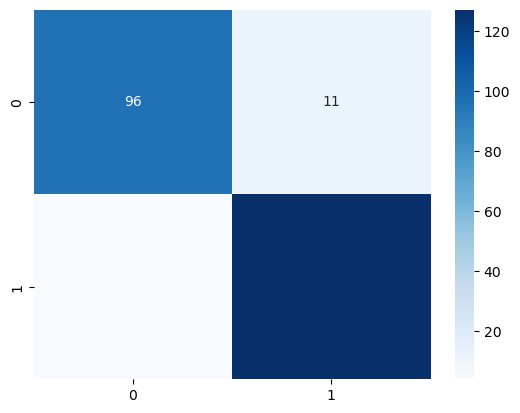


Model: AdaBoost
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Train Accuracy: 0.8645
Test Accuracy: 0.8613
Train F1 Score: 0.8716
Test F1 Score: 0.8791
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       107
           1       0.85      0.92      0.88       131

    accuracy                           0.86       238
   macro avg       0.87      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

Confusion Matrix (Test Data):


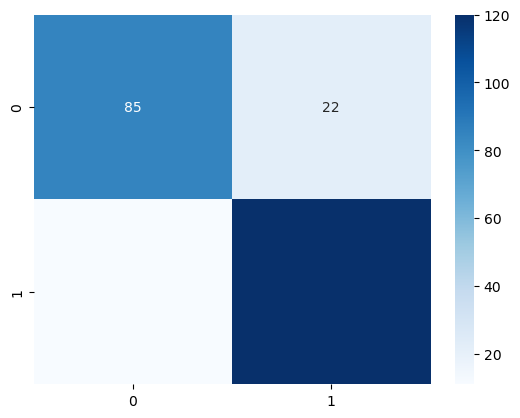

In [156]:
# Using Grid search to find the best hyperparameter for each model
for model_name, model in models.items():
    print(f'\nModel: {model_name}')
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f'Best Parameters: {grid_search.best_params_}')
    
    train_acc, test_acc, train_f1, test_f1 = evaluate_model(best_model, X_train, X_test, y_train, y_test)
    
    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1
    })

### 10. Model Comparison

                Model                                  Best Params  \
0                 KNN                           {'n_neighbors': 7}   
1                 SVC                      {'C': 10, 'gamma': 0.1}   
2        DecisionTree                             {'max_depth': 9}   
3  LogisticRegression                                   {'C': 0.1}   
4        RandomForest         {'max_depth': 9, 'n_estimators': 50}   
5          NaiveBayes                                           {}   
6             XGBoost  {'learning_rate': 0.2, 'n_estimators': 200}   
7            AdaBoost  {'learning_rate': 0.1, 'n_estimators': 200}   

   Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  
0        0.879202       0.873950        0.885344       0.888889  
1        0.964286       0.899160        0.965932       0.906977  
2        0.982143       0.890756        0.982983       0.898438  
3        0.832983       0.861345        0.839556       0.874525  
4        0.978992       0.936975       

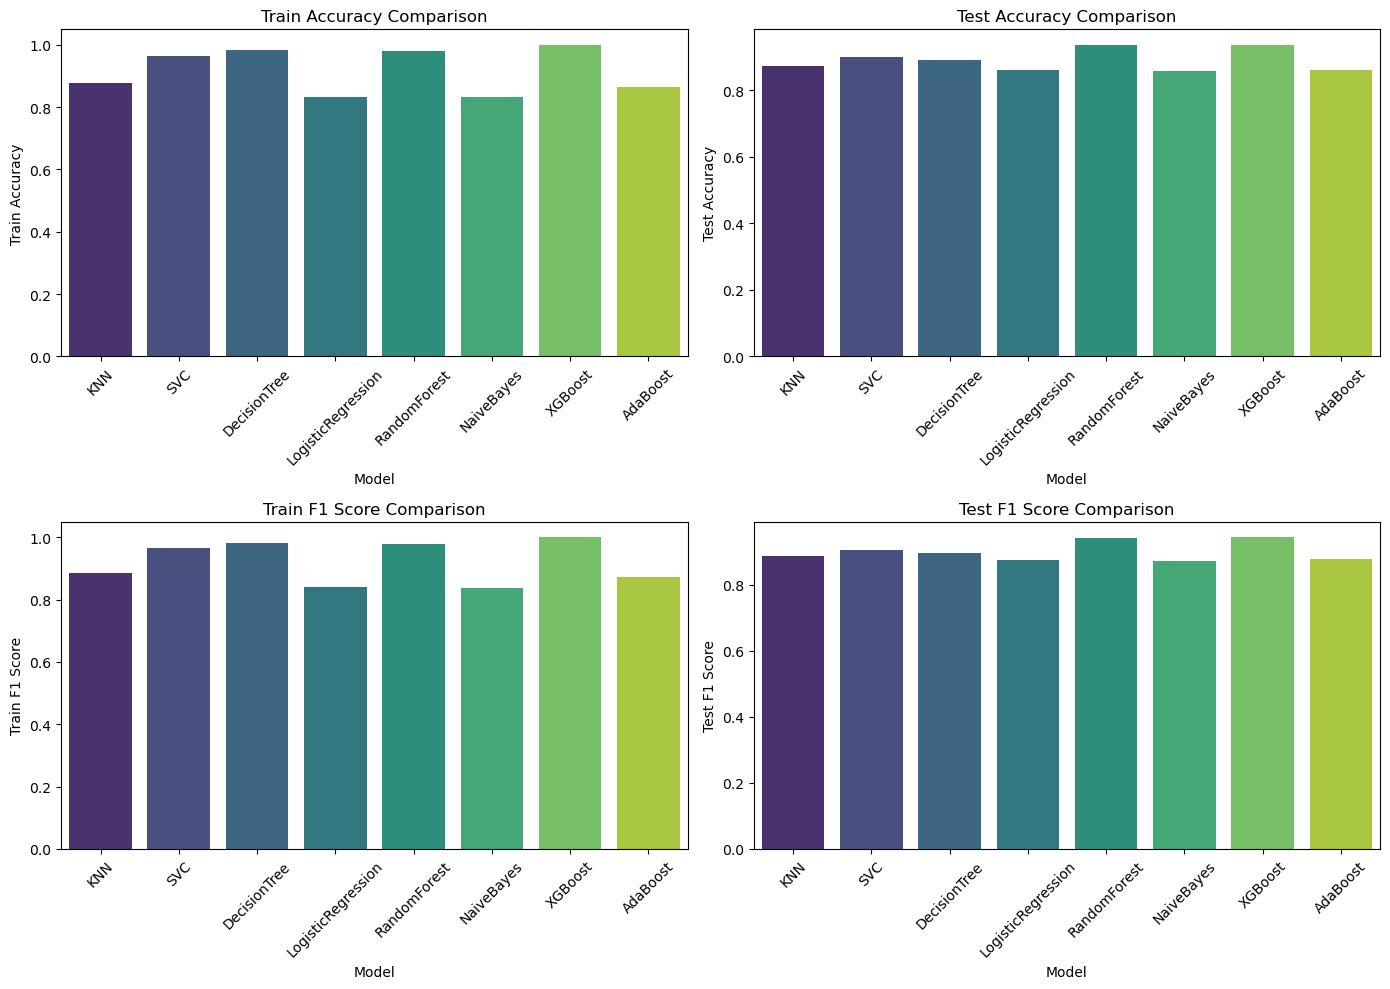

In [162]:
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score']

for idx, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xlabel('Model')
    for item in axes[idx].get_xticklabels():
        item.set_rotation(45)

plt.tight_layout()
plt.show()

### 11. Model Selection

In [163]:
# Finding the best model based on Test Accuracy and Test F1 Score
best_model_accuracy_row = results_df.loc[results_df['Test Accuracy'].idxmax()]
best_model_f1_row = results_df.loc[results_df['Test F1 Score'].idxmax()]

print("Best Model based on Test Accuracy:")
print(best_model_accuracy_row)

print("\nBest Model based on Test F1 Score:")
print(best_model_f1_row)

results_df['Average Score'] = (results_df['Test Accuracy'] + results_df['Test F1 Score']) / 2
best_model_combined_row = results_df.loc[results_df['Average Score'].idxmax()]

print("\nBest Model based on Combined Test Accuracy and Test F1 Score:")
print(best_model_combined_row)

Best Model based on Test Accuracy:
Model                                     RandomForest
Best Params       {'max_depth': 9, 'n_estimators': 50}
Train Accuracy                                0.978992
Test Accuracy                                 0.936975
Train F1 Score                                0.980119
Test F1 Score                                  0.94382
Name: 4, dtype: object

Best Model based on Test F1 Score:
Model                                                 XGBoost
Best Params       {'learning_rate': 0.2, 'n_estimators': 200}
Train Accuracy                                            1.0
Test Accuracy                                        0.936975
Train F1 Score                                            1.0
Test F1 Score                                        0.944238
Name: 6, dtype: object

Best Model based on Combined Test Accuracy and Test F1 Score:
Model                                                 XGBoost
Best Params       {'learning_rate': 0.2, 'n_estimators':

In [164]:
best_xgb_params = {'learning_rate': 0.2, 'n_estimators': 200}

xgb_model = XGBClassifier(**best_xgb_params)

xgb_model.fit(X_train, y_train)

y_test_pred = xgb_model.predict(X_test)

# DataFrame to show true vs predicted values
prediction_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_test_pred
})

prediction_df['Correct Prediction'] = prediction_df['True Label'] == prediction_df['Predicted Label']

print(prediction_df.head(50))

prediction_df.value_counts()

      True Label  Predicted Label  Correct Prediction
390            1                1                True
247            1                0               False
260            0                0                True
155            1                1                True
984            1                1                True
413            1                1                True
802            0                0                True
58             0                0                True
752            0                0                True
901            0                0                True
1131           0                0                True
759            1                1                True
715            0                0                True
790            0                0                True
706            1                1                True
70             1                1                True
522            1                1                True
1045           1            

True Label  Predicted Label  Correct Prediction
1           1                True                  127
0           0                True                   96
            1                False                  11
1           0                False                   4
Name: count, dtype: int64

In [160]:
prediction_df.isnull().sum()

True Label            0
Predicted Label       0
Correct Prediction    0
dtype: int64

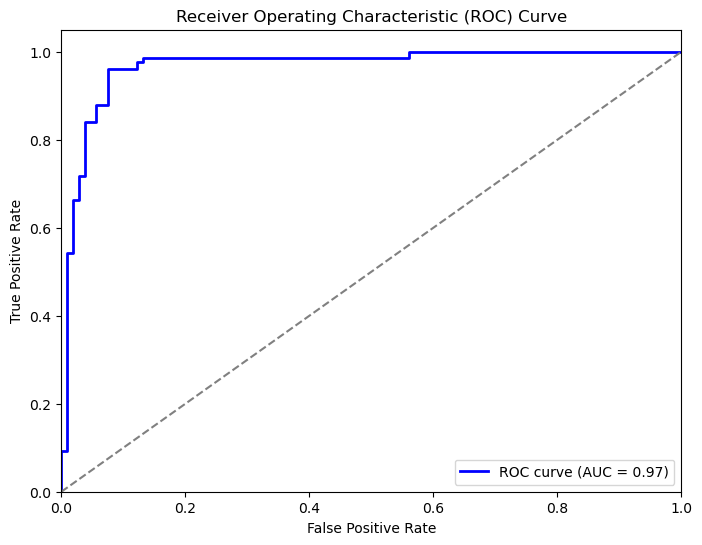

In [161]:
y_test_probs = rfc_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = roc_auc_score(y_test, y_test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()